In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [4]:
#to check null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

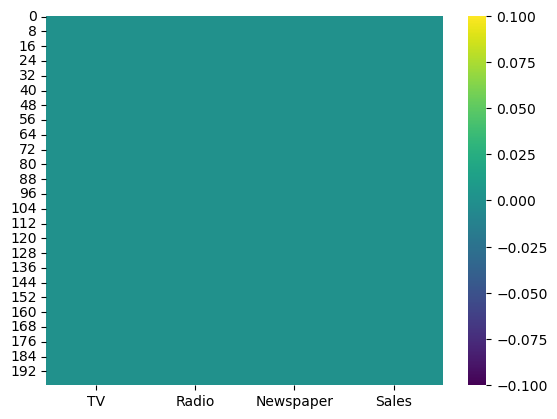

In [6]:
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
X=df.drop('Sales',axis=1) #input variable
Y=df['Sales'] #output variable 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [12]:
X_train.shape , X_test.shape

((140, 3), (60, 3))

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

Index(['TV', 'Radio', 'Newspaper'], dtype='object')


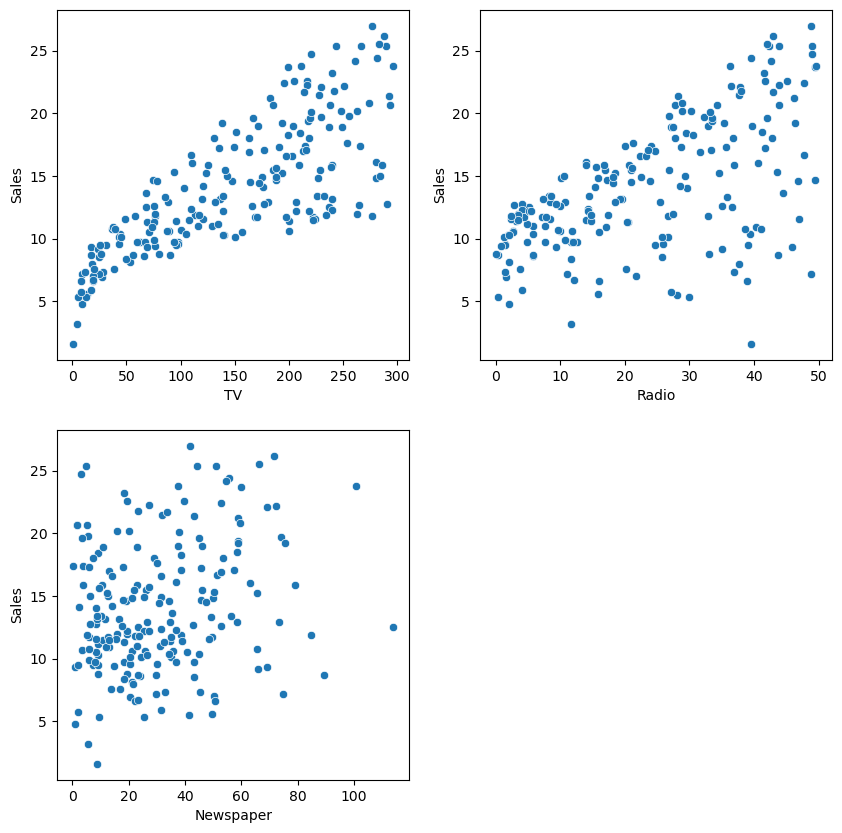

In [16]:
column=X.columns
print(column)
plt.figure(figsize=(10,10))
for i, col in enumerate(column):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data=df,x=col,y='Sales')
plt.show() 

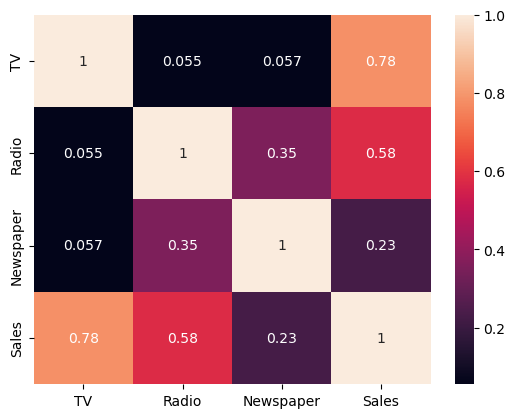

In [17]:
#check correlation values 
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
#correlation values with newspaper and sales=0.23 

In [19]:
# Modeling with input : TV and output sales
# SLR(simple linear regression)  : only one input
# Select input and output from dataset
X=df[['TV']] #always expect input : 2D
Y=df['Sales'] #output(targer) : 1D

In [20]:
#split data into 70% and 30%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
X_train.head()

,TV
116,139.2
67,139.3
78,5.4
42,293.6
17,281.4


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
liner_model=LinearRegression()
liner_model.fit(X_train, Y_train)

LinearRegression()

In [24]:
slop = liner_model.coef_
print("slope/ coefficient is :",slop)

slope/ coefficient is : [0.04812204]


In [25]:
Y_pred=liner_model.predict(X_test)

In [26]:
#create a dictionary 
dict={"Actual Oputpt":Y_test,"Prediced output":Y_pred}
#convert dictionary into dataframe
df1=pd.DataFrame(dict)
df1['TV']=X_test #to add new column

In [27]:
df1

,Actual Oputpt,Prediced output,TV
58,23.8,17.067646,210.8
40,16.6,16.668233,202.5
34,9.5,11.528799,95.7
102,14.8,20.407316,280.2
184,17.6,19.136894,253.8
198,25.5,20.570931,283.6
95,16.9,14.781849,163.3
4,12.9,15.623985,180.8
29,10.5,10.320936,70.6
168,17.1,17.289007,215.4


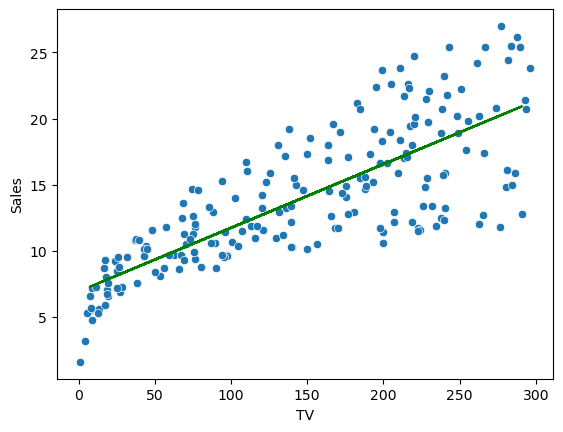

In [28]:
sns.scatterplot(data=df,x='TV',y='Sales')
plt.plot(X_test,Y_pred,c='green')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
print("MSE: ",mean_squared_error(Y_test,Y_pred))

MSE:  10.571057434656955


In [31]:
mse=mean_squared_error(Y_test,Y_pred)
rme=np.sqrt(mse)
print("Root mean squared error: ",rme)

Root mean squared error:  3.251316261863333


In [32]:
print("R2-score: ",r2_score(Y_test,Y_pred))

R2-score:  0.575061860494331


In [36]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [37]:
#take input radio with output sales and create a model
X=df[['Radio']] #input 2D
Y=df['Sales'] #output 1D

In [38]:
#train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [39]:
liner_model=LinearRegression()
liner_model.fit(X_train, Y_train)

LinearRegression()

In [40]:
Y_pred=liner_model.predict(X_test)

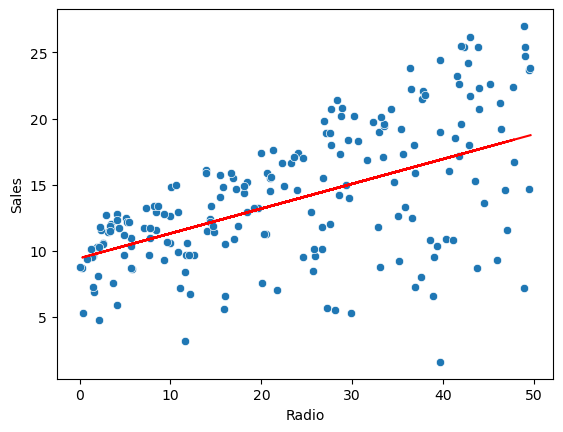

In [41]:
sns.scatterplot(data=df,x='Radio',y='Sales')
plt.plot(X_test,Y_pred,c='red')
plt.show()

In [42]:
dict={"Actual Oputpt":Y_test,"Predicted output":Y_pred}
#convert dictionary into dataframe
df1=pd.DataFrame(dict)
df1['Radio']=X_test #to add new column

In [43]:
df1.head()

,Actual Oputpt,Predicted output,Radio
58,23.8,18.739984,49.6
40,16.6,13.621758,22.3
34,9.5,9.703410,1.4
102,14.8,11.334493,10.1
184,17.6,13.434278,21.3


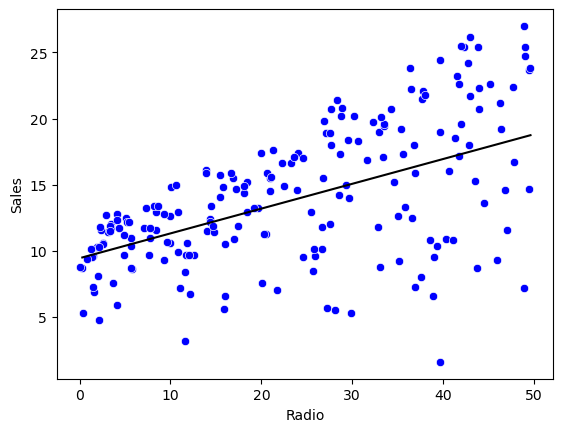

In [48]:
#visualize the radio data
sns.scatterplot(data=df,x='Radio',y='Sales',color='blue')
#plt.plot(X_test,Y_pred,c='yellow')
sns.lineplot(data=df1,x='Radio',y='Predicted output',color='black')
plt.show()

In [49]:
print("R2-score: ",r2_score(Y_test,Y_pred))

R2-score:  0.41293932917162335


In [52]:
X=df[['Newspaper']] #input 2D
Y=df['Sales'] #output 1D

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [54]:
liner_model=LinearRegression()
liner_model.fit(X_train, Y_train)

LinearRegression()

In [55]:
Y_pred=liner_model.predict(X_test)

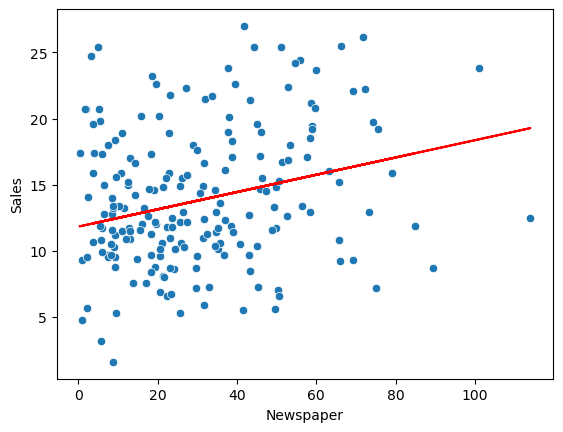

In [56]:
sns.scatterplot(data=df,x='Newspaper',y='Sales')
plt.plot(X_test,Y_pred,c='red')
plt.show()

In [57]:
dict={"Actual Oputpt":Y_test,"Predicted output":Y_pred}
#convert dictionary into dataframe
df1=pd.DataFrame(dict)
df1['Newspaper']=X_test #to add new column

In [58]:
df1.head()

,Actual Oputpt,Predicted output,Newspaper
58,23.8,14.292250,37.7
40,16.6,13.893795,31.6
34,9.5,12.313040,7.4
102,14.8,13.227526,21.4
184,17.6,13.789282,30.0


In [59]:
print("R2-score: ",r2_score(Y_test,Y_pred))

R2-score:  -0.024953278429509007


In [60]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [61]:
X=df.drop('Sales',axis=1) #input
Y=df['Sales'] #output

In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [67]:
liner_model=LinearRegression()
liner_model.fit(X_train, Y_train)

LinearRegression()

In [68]:
Y_pred=liner_model.predict(X_test)

In [69]:
print("R2-score: ",r2_score(Y_test,Y_pred))

R2-score:  0.9224605706201434


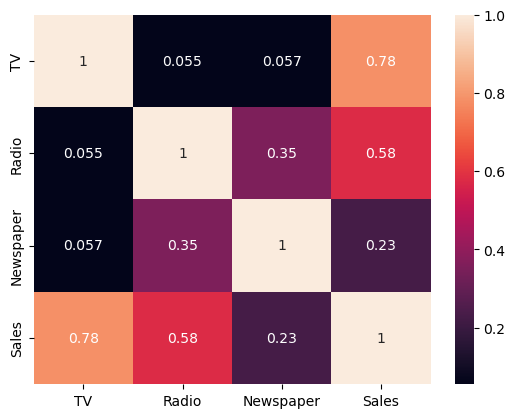

In [70]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [71]:
X=df[['TV','Radio']] #input , always 2D
Y=df['Sales'] #output always 1D

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [73]:
liner_model=LinearRegression()
liner_model.fit(X_train, Y_train)

LinearRegression()

In [74]:
Y_pred=liner_model.predict(X_test)

In [75]:
print("R2-score: ",r2_score(Y_test,Y_pred))

R2-score:  0.9230321850256801


In [76]:
residual=Y_test-Y_pred
print(residual)

58     2.121325
40     0.161080
34     1.790963
102   -3.121584
184   -1.071115
198    1.751649
95     0.650372
4     -0.476570
29     1.376352
168   -0.175850
171    0.094861
18     1.442691
11     0.085973
89     0.085626
110   -1.628579
118    0.475105
159    0.479785
35    -4.548925
136   -1.595709
59     0.296797
51     1.313444
16    -0.151716
44    -0.209470
94     1.002953
31     0.540576
162   -0.130433
38     0.367320
28    -0.566610
193    1.338393
27    -1.310358
47     1.593306
165   -2.684544
194    0.978638
177   -0.645678
176    0.201464
97     0.118795
174   -2.516140
73     0.943990
69     1.352080
172    0.143738
108    1.648793
107    1.435349
189    0.707220
14     0.602824
56    -2.799666
19     0.469889
114   -0.352296
39     1.127387
185    1.993211
124    0.216236
98     1.311803
123    0.305838
119   -0.118500
53     1.450047
33    -1.594481
179    0.079578
181   -1.988236
106    1.106689
199   -1.995585
138    0.014138
Name: Sales, dtype: float64


In [77]:
#create a dictonary
dic={'Y_pred':Y_pred,'Residual':residual}
df1=pd.DataFrame(dic)
df1.head()

,Y_pred,Residual
58,21.678675,2.121325
40,16.438920,0.161080
34,7.709037,1.790963
102,17.921584,-3.121584
184,18.671115,-1.071115


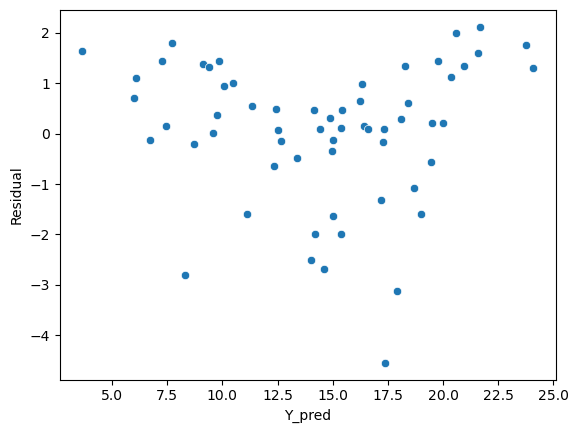

In [78]:
sns.scatterplot(data=df1,x='Y_pred',y='Residual')
plt.show()

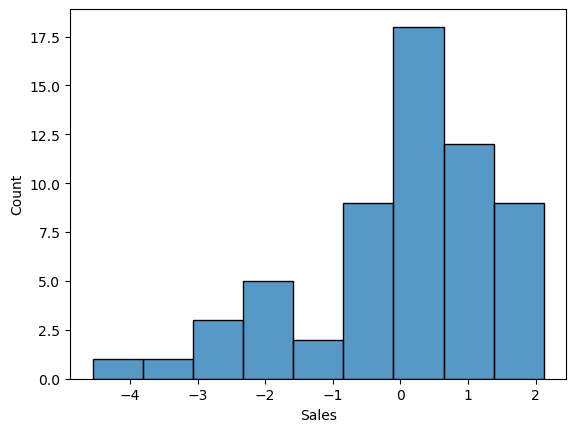

In [79]:
sns.histplot(residual)
plt.show()

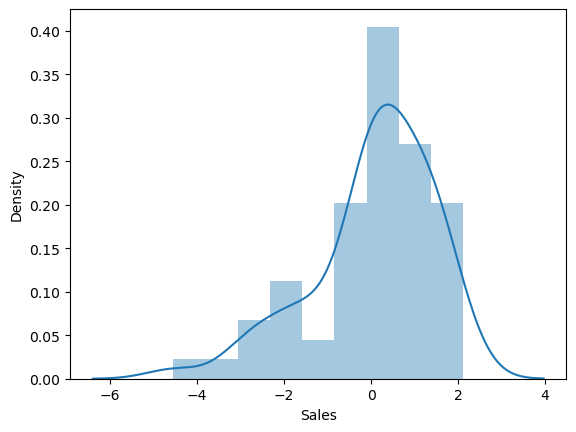

In [80]:
sns.distplot(residual)
plt.show()

In [81]:
residual.skew()

-1.0935181639447331

In [82]:
#In above distplot curve , -ve skewness found means no normal distributed curve
#found means it is a ASsymmetric curve means this assumption is not fullfill
     

In [83]:
#here we handled multicolinearity (removed multicolinearity (problem)
#but not working 3 assumption 
#means no relation relationship means here create a curve
##relation should be HOMOSKEDAStik : means datapoints are closely each other
#should not by Heteroskedastic  means should not be scattered
#if linear relationship occurs
# no normal distributed curve
     

#increase the degress of X means increase the power of X means 
#independent vairable(input variable)
#if increasing the degree or power of independent variable then It is called
#polynomial Linear regression(PLR)
     

In [84]:
#Input : TV and radio means X1=TV X2=radio  and output Y=sales
#increase the degree of input variable=2
#equation Y=m1*TV*2+m2*TV+m3*radio*2+m4*radio+b
#we work on dataset 
#apply polynomial linear regression means increase the degree of independent
#variable X means degree=2 
#equation : ax2+bx+c=0  here 2 inputs ax1*2+bx1+cx2*2+dx2+e
#here we have 2 inputs : - X=TV,radio means X1="TV" and X2="radio"
#eq. m1*TV*2+m2*TV1+m3*radio2+m4*radio*1+b

In [85]:
#with sales
X=df[['TV','Radio']] #input , always 2D
Y=df['Sales'] #output always 1D

In [86]:
#increasing the degree of input X so call inbuilt class PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [87]:
'''#create object of PolynomialFeatures class and pass the degree of input
poly=PolynomialFeatures(2) #there pass the degree =2 of input
#eq. m1*TV*2+m2*TV1+m3*radio2+m4*radio*1+b
#here Equation Y_pred=m1*TV*2+m2*TV+m3*radio*2+m4*radio+c
'''

#create object of PolynomialFeatures class and pass the degree of input
poly=PolynomialFeatures(3) #there pass the degree =3 of input
#eq. m1*TV*2+m2*TV1+m3*radio2+m4*radio*1+b
#here Equation Y_pred=m1*TV*2+m2*TV+m3*radio*2+m4*radio+c
'''
#create object of PolynomialFeatures class and pass the degree of input
poly=PolynomialFeatures(4) #there pass the degree =4 of input
#eq. m1*TV*2+m2*TV1+m3*radio2+m4*radio*1+b
#here Equation Y_pred=m1*TV*2+m2*TV+m3*radio*2+m4*radio+c
'''
     

'\n#create object of PolynomialFeatures class and pass the degree of input\npoly=PolynomialFeatures(4) #there pass the degree =4 of input\n#eq. m1*TV*2+m2*TV1+m3*radio2+m4*radio*1+b\n#here Equation Y_pred=m1*TV*2+m2*TV+m3*radio*2+m4*radio+c\n'

In [88]:

X_poly=poly.fit_transform(X)
#fit_transform() inbuilt method of PolynomialFeatures class

In [89]:
#train test split
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [90]:
#object of linearregression
lr=LinearRegression()
#train the model with 70% data
lr.fit(X_train,Y_train)

LinearRegression()

In [91]:
lr.coef_ #6 in array coz degree is 2 #

array([ 0.00000000e+00,  9.16483199e-02,  2.25347616e-02, -4.65701531e-04,
        1.30652795e-03, -1.62567917e-04,  8.31531755e-07, -7.44270012e-07,
       -1.18928234e-06,  9.37589630e-06])

In [92]:
lr.intercept_

4.162147477374399

In [93]:
#test the model
Y_pred=lr.predict(X_test)
     

In [94]:
#how will we find that this error is acurate as there is no range given
#check model is perfect or not , find r2-score
print("R2-score: ",r2_score(Y_test,Y_pred))
#0-1, if negetive- we consider it as 0 only

R2-score:  0.994183681814092


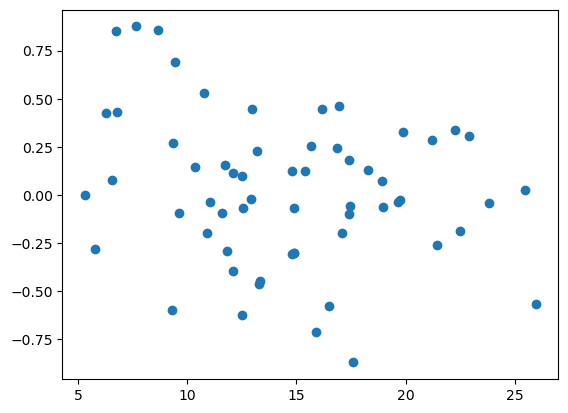

In [95]:
#chek assumptions
#1. check linear relation
#find residual 
residual=Y_test-Y_pred
plt.scatter(Y_pred,residual)
plt.show()

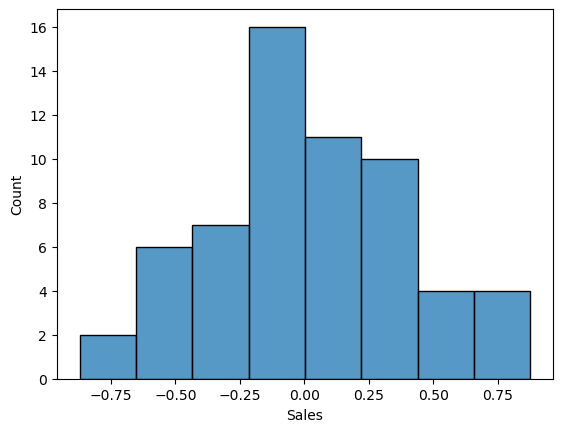

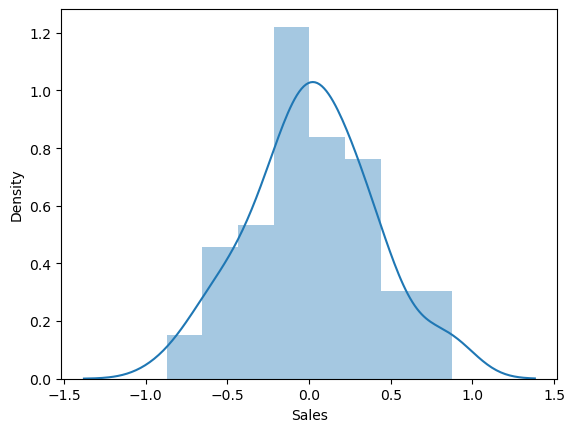

0.07135639543573817

In [96]:
#create normal distribution curve
sns.histplot(residual)
plt.show()
sns.distplot(residual)
plt.show()
residual.skew()
     


In [97]:
#conclusion
'''
as the model dosent full fill all 3 assumptions even after changing the degree
we say the model is not perfect 
feature tv and radio are giving 99% accuracy
so newspaper is not an important feature : we drop it 
input: 'TV' and 'Radio' important 
linear model only get succefull when all assumptions come true 
'''

"\nas the model dosent full fill all 3 assumptions even after changing the degree\nwe say the model is not perfect \nfeature tv and radio are giving 99% accuracy\nso newspaper is not an important feature : we drop it \ninput: 'TV' and 'Radio' important \nlinear model only get succefull when all assumptions come true \n"